In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df = pd.read_csv("loan dataset.csv")

In [7]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,100.000000,100.000000,100.000000,95.000000,94.000000
mean,3505.380000,1185.190000,102.500000,341.052632,0.861702
std,1419.366951,1423.159337,30.147282,66.803518,0.347063
min,1000.000000,0.000000,17.000000,60.000000,0.000000
25%,2500.000000,0.000000,87.250000,360.000000,1.000000
50%,3333.000000,1035.000000,110.000000,360.000000,1.000000
75%,4191.000000,2046.250000,122.750000,360.000000,1.000000
max,9323.000000,8980.000000,144.000000,480.000000,1.000000


In [10]:
print(df.shape)

(100, 13)


In [11]:
print(df.info)

<bound method DataFrame.info of      Loan_ID Gender Married Dependents     Education Self_Employed  \
0   LP001003   Male     Yes          1      Graduate            No   
1   LP001005   Male     Yes          0      Graduate           Yes   
2   LP001006   Male     Yes          0  Not Graduate            No   
3   LP001008   Male      No          0      Graduate            No   
4   LP001013   Male     Yes          0  Not Graduate            No   
..       ...    ...     ...        ...           ...           ...   
95  LP001535   Male      No          0      Graduate            No   
96  LP001546   Male      No          0      Graduate           NaN   
97  LP001560   Male     Yes          0  Not Graduate            No   
98  LP001565   Male     Yes          1      Graduate            No   
99  LP001572   Male     Yes          0      Graduate            No   

    ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0              4583             1508.0       128.0     

In [12]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [13]:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
95,LP001535,Male,No,0,Graduate,No,3254,0.0,50.0,360.0,1.0,Urban,Y
96,LP001546,Male,No,0,Graduate,NaN,2980,2083.0,120.0,360.0,1.0,Rural,Y
97,LP001560,Male,Yes,0,Not Graduate,No,1863,1041.0,98.0,360.0,1.0,Semiurban,Y
98,LP001565,Male,Yes,1,Graduate,No,3089,1280.0,121.0,360.0,0.0,Semiurban,N
99,LP001572,Male,Yes,0,Graduate,No,9323,0.0,75.0,180.0,1.0,Urban,Y


In [14]:
print(df.columns.tolist())

['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status']


In [15]:
import seaborn as sns

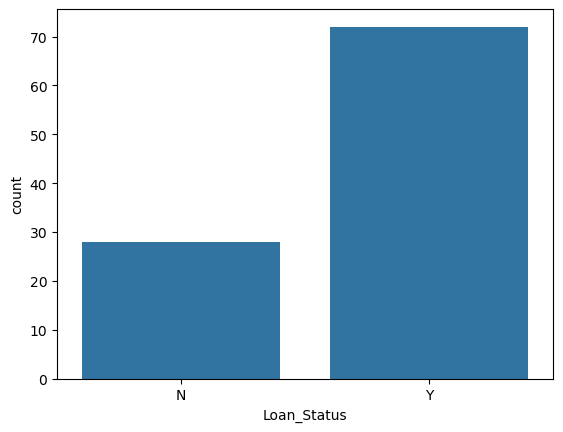

In [16]:
sns.countplot(x="Loan_Status", data=df)
plt.show()

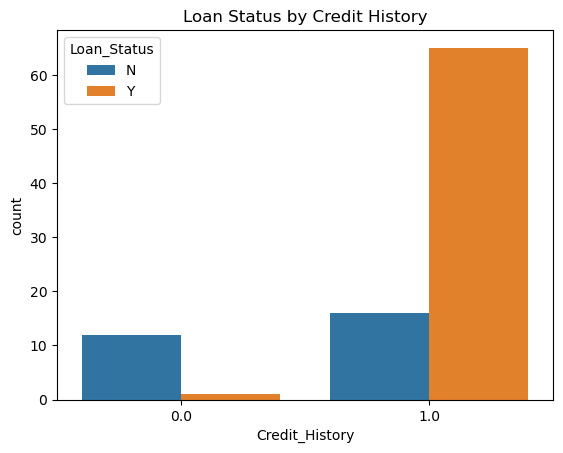

In [17]:
sns.countplot(x="Credit_History", hue="Loan_Status", data=df)
plt.title("Loan Status by Credit History")
plt.show()

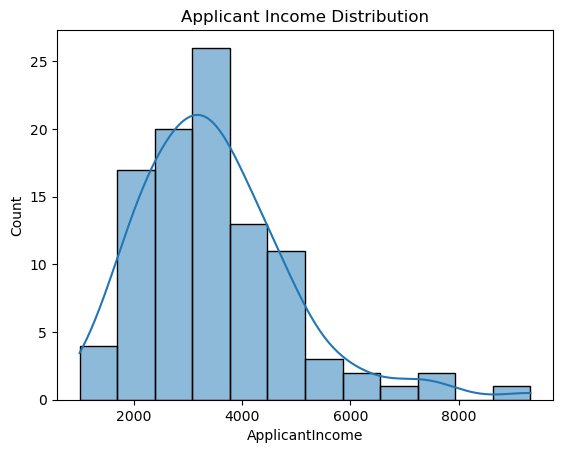

In [19]:
sns.histplot(df["ApplicantIncome"], kde=True)
plt.title("Applicant Income Distribution")
plt.show()

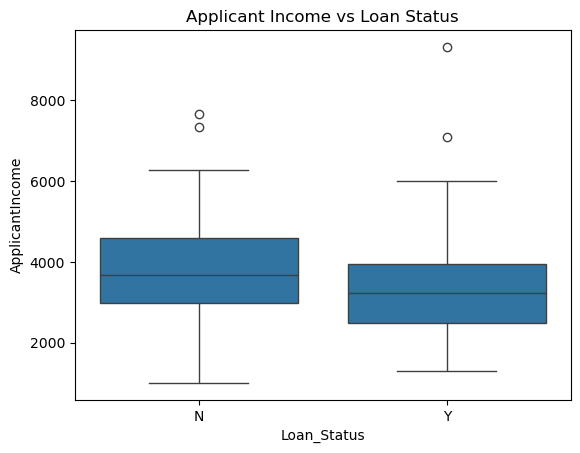

In [20]:
sns.boxplot(x="Loan_Status", y="ApplicantIncome", data=df)
plt.title("Applicant Income vs Loan Status")
plt.show()

EDA

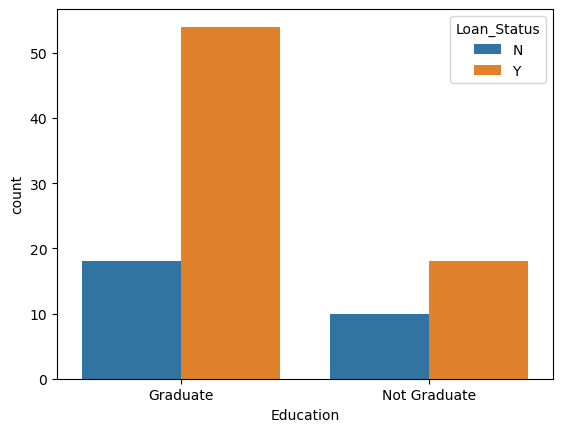

In [23]:
sns.countplot(x="Education", hue="Loan_Status", data=df)
plt.show()

In [25]:
df = df.drop(columns=["Loan_ID"])

In [26]:
df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
df["Self_Employed"].fillna(df["Self_Employed"].mode()[0], inplace=True)
df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].median(), inplace=True)
df["Credit_History"].fillna(df["Credit_History"].mode()[0], inplace=True)

/var/folders/c5/cwm7z0wx6md9vxg3bpl3zfkm0000gn/T/ipykernel_5434/3929629617.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Gender"].fillna(df["Gender"].mode()[0], inplace=True)
/var/folders/c5/cwm7z0wx6md9vxg3bpl3zfkm0000gn/T/ipykernel_5434/3929629617.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting valu

In [27]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in ["Gender", "Married", "Dependents", "Education", "Self_Employed", "Property_Area", "Loan_Status"]:
    df[col] = le.fit_transform(df[col])

In [29]:
X = df.drop(columns=["Loan_Status"])
y = df["Loan_Status"]

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Training the Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8

Confusion Matrix:
 [[ 2  3]
 [ 1 14]]

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.40      0.50         5
           1       0.82      0.93      0.88        15

    accuracy                           0.80        20
   macro avg       0.75      0.67      0.69        20
weighted avg       0.78      0.80      0.78        20



/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training other models and checking what which is the most accurate

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
print("Decision Tree Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print("Random Forest Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

# Support Vector Machine
svm = SVC()
svm.fit(X_train, y_train)
print("SVM Accuracy:", accuracy_score(y_test, svm.predict(X_test)))

Decision Tree Accuracy: 0.8
Random Forest Accuracy: 0.95
SVM Accuracy: 0.75


Hyperparameter Training

In [34]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4]
}

grid = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best CV Accuracy:", grid.best_score_)


Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Best CV Accuracy: 0.8625


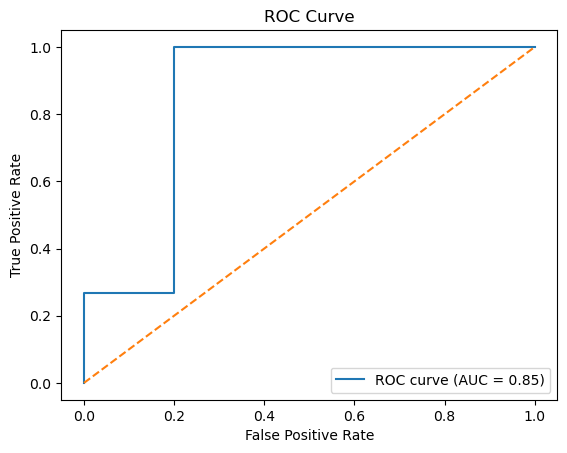

In [35]:
from sklearn.metrics import roc_curve, auc

y_pred_proba = grid.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.plot([0,1],[0,1],"--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [36]:
import joblib
joblib.dump(grid.best_estimator_, "loan_model.pkl")

['loan_model.pkl']